In [3]:
# Метод борьбы с переобучением, воспользуемся droupout

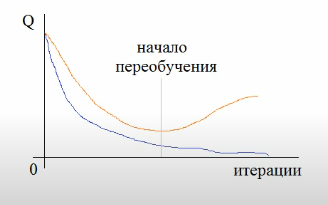

In [13]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split

In [5]:
# На каждой итерации обучения НС, часть нейронов следует отбросить
# с некоторой вероятностью p. Таким образом оставшиеся нейроны возьмут на себя
# их функцию


In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
x_train = x_train / 255
x_test = x_test / 255

In [8]:
y_train_category = keras.utils.to_categorical(y_train, 10)
y_test_category = keras.utils.to_categorical(y_test, 10)

In [11]:
# получим валидационную выборку

x_train_split, x_validation_split, y_train_split, y_validation_split = train_test_split(
    x_train, y_train_category, test_size=0.2)


In [14]:
model = keras.Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dropout(0.5), # ставится после слоя, к которому хотим применить
    Dense(10, activation='softmax')
])

In [15]:
my_SGD = keras.optimizers.SGD(learning_rate=0.001, momentum=0.0, nesterov=True)

model.compile(
    optimizer=my_SGD,
    loss='categorical_crossentropy',
    metrics=['accuracy']
    
)

In [17]:
his = model.fit(x_train, y_train_category, batch_size=32, epochs=50, 
         validation_data=(x_validation_split, y_validation_split))

Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4945 - accuracy: 0.8587 - val_loss: 0.3756 - val_accuracy: 0.8982
Epoch 2/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4828 - accuracy: 0.8608 - val_loss: 0.3651 - val_accuracy: 0.9015
Epoch 3/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4712 - accuracy: 0.8650 - val_loss: 0.3561 - val_accuracy: 0.9020
Epoch 4/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4571 - accuracy: 0.8680 - val_loss: 0.3478 - val_accuracy: 0.9035
Epoch 5/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4480 - accuracy: 0.8715 - val_loss: 0.3404 - val_accuracy: 0.9059
Epoch 6/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4415 - accuracy: 0.8730 - val_loss: 0.3335 - val_accuracy: 0.9081
Epoch 7/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4331 - accuracy: 0.8753 - val_loss: 0.3273 - val_accuracy:

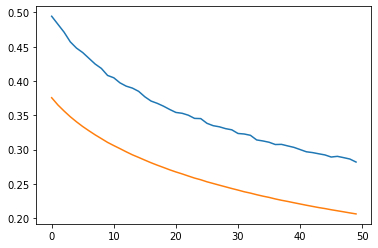

In [18]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()